In [3]:
import pandas as pd

df = pd.read_csv("data/win25ML_manufquality.csv")

In [4]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First few rows of the dataset:
    diameter  roughness   hardness  true_label
0  49.881855   2.269186  44.757253         0.0
1  49.407714   2.366287  44.293119         0.0
2  49.637506   2.594681  44.057955         0.0
3  49.634800   2.478449  44.843307         0.0
4  49.170037   2.558880  45.350286         0.0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   diameter    1000 non-null   float64
 1   roughness   1000 non-null   float64
 2   hardness    1000 non-null   float64
 3   true_label  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB
None


In [8]:
df.true_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: true_label
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [9]:
df.true_label.describe()

count    1000.000000
mean        0.900000
std         0.889264
min         0.000000
25%         0.000000
50%         1.000000
75%         1.250000
max         3.000000
Name: true_label, dtype: float64

In [10]:
df.true_label.value_counts()

true_label
0.0    400
1.0    350
2.0    200
3.0     50
Name: count, dtype: int64

In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          diameter    roughness     hardness   true_label
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.055481     2.651517    44.077935     0.900000
std       0.649085     0.674764     2.182128     0.889264
min      48.439039     1.091747    38.372228     0.000000
25%      49.648782     2.228862    42.038254     0.000000
50%      49.964106     2.565347    44.637696     1.000000
75%      50.329674     2.972429    45.530318     1.250000
max      53.866736     5.785497    48.448548     3.000000


In [7]:
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
            diameter  roughness  hardness  true_label
diameter    1.000000   0.390332 -0.012459    0.443237
roughness   0.390332   1.000000 -0.724317    0.195608
hardness   -0.012459  -0.724317  1.000000   -0.087969
true_label  0.443237   0.195608 -0.087969    1.000000


In [1]:
import matplotlib.pyplot as plt

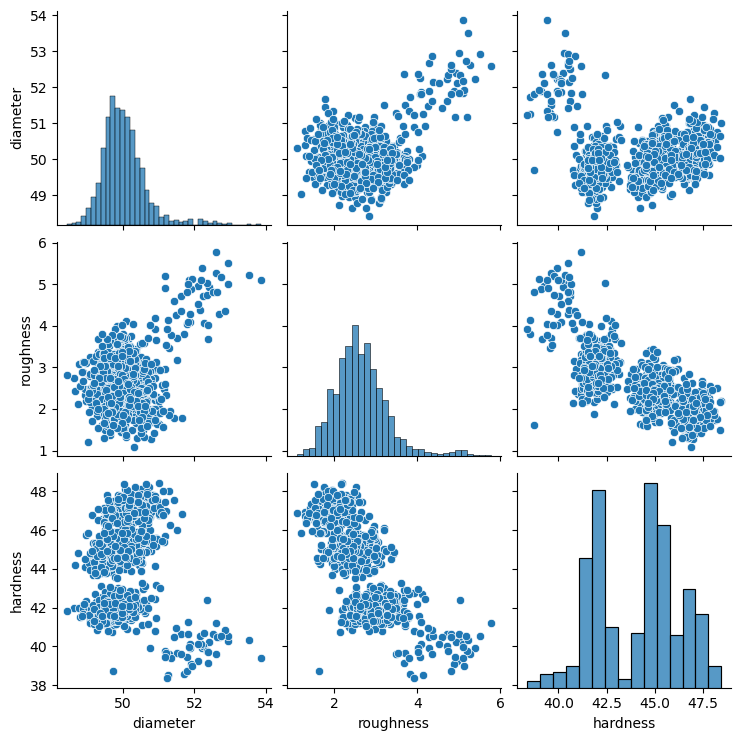

In [12]:
import seaborn as sns
pplot = sns.pairplot(df[['diameter', 'roughness', 'hardness']])

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['diameter', 'roughness', 'hardness']] = scaler.fit_transform(df[['diameter', 'roughness', 'hardness']])

In [27]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, random_state=5).fit(df[['diameter', 'roughness', 'hardness']])

In [28]:
probs = gm.predict_proba(df[['diameter', 'roughness', 'hardness']])
predictions = gm.predict(df[['diameter', 'roughness', 'hardness']])

In [30]:
import numpy as np

In [33]:
logs_probs = gm.score_samples(df[['diameter', 'roughness', 'hardness']])
threshold = np.percentile(logs_probs, 5) #5th percentile
anomalies = df[logs_probs < threshold]

df['gmm-cluster'] = predictions
df['gmm-score'] = -logs_probs
df['is_anomaly'] = anomalies['gmm-score']

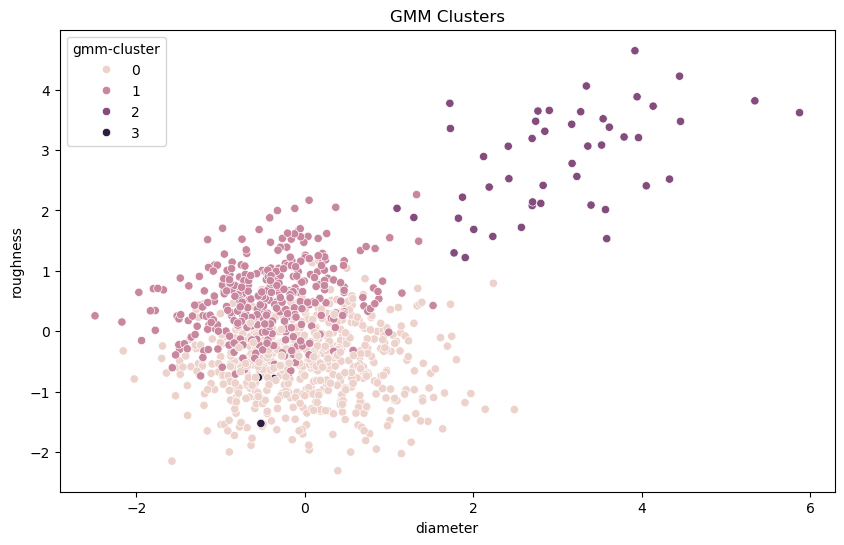

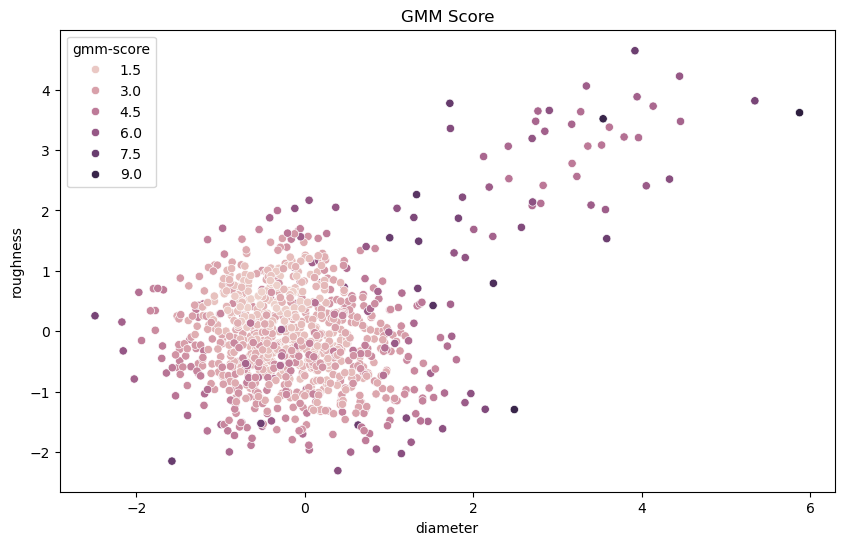

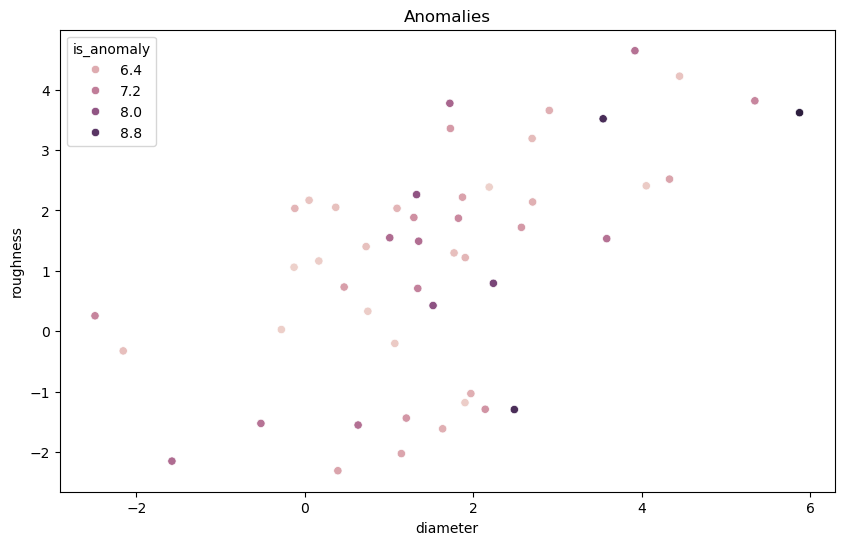

In [35]:
def plot_clusters(df, x, y, hue, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=hue, data=df)
    plt.title(title)
    plt.show()

plot_clusters(df, 'diameter', 'roughness', 'gmm-cluster', 'GMM Clusters')

plot_clusters(df, 'diameter', 'roughness', 'gmm-score', 'GMM Score')

plot_clusters(df, 'diameter', 'roughness', 'is_anomaly', 'Anomalies')